In [3]:
import torch
from torch.optim import Adam
from torch import nn
from torch.nn import functional as F

import numpy as np

## Тензоры: введение
Формально, тензор - это обобщение матриц на n-мерное пространство.
С практической точки зрения это значит, что тензор - это n-мерный массив, с которым можно совершать те же операции, что и с матрицами.

Эта часть важна, поскольку для реализации DQN вам потребуется использовать несколько операций с ними.

In [4]:
# Создание тензоров
np_array = np.ones((2, 3, 4))
tensor = torch.from_numpy(np_array)

print(tensor)

tensor = torch.Tensor(np_array)

print(tensor)

ones = torch.ones((4, 5))

print(ones)

random_noise = torch.randn((4, 5))

print(random_noise)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]], dtype=torch.float64)
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[-0.8043,  0.4612, -0.3038, -1.9235,  0.7264],
        [ 1.4055,  1.0898, -0.8549, -0.6077,  1.3133],
        [ 0.3316,  0.3887, -0.1566, -0.4545,  0.5856],
        [-1.5148, -2.1631, -0.4887,  0.5519, -1.3670]])


In [8]:
# Операции с тензорами
## Матричное умножение
t1 = tensor.matmul(random_noise)

## Поэлементное умножение
t2 = tensor * torch.randn(tensor.size())

## Сумма вдоль оси координат
t3 = tensor.sum(dim=1)

## Максимум вдоль оси координат
t4, idx_t4 = tensor.max(dim=2)

In [6]:
# Индексирование 
print(tensor[1, :, ::2])

ids = [0, 1]
print(tensor[ids])
print(tensor[:, ids])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [10]:
# Изменение размерности
## Изменение формы тензора, количество элементов сохраняется
t5 = tensor.view(-1, 2)

## Увеличение размерности тензора. Количество элементов увеличивается так, чтобы форма тензора соответствала заданному значению
t6 = torch.ones((1, 1, 1)).expand_as(tensor)
t7 = torch.ones((1, 1, 1)).expand(tensor.size())

## Добавление новой оси координат
t8 = tensor.unsqueeze(dim=-1)

## Слои нейронной сети и нейронные сети: введение
Слои нейронной сети необходимы для того, чтобы собрать из них нейронную сеть для использования ее в дальнейшем.

Слои могут содержать обучаемые параметры. Для таких параметров возможно автоматическое вычисление производной при помощи PyTorch.

Также параметры слоев автоматически инициализируются случайными значениями. Это необходимо для того, чтобы производная не была равна 0.

In [11]:
# Линейный слой
m1 = nn.Linear(32, 4)

# Сверточный слой
m2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2, padding=0)

# Функция активации
a1 = nn.ReLU()

In [12]:
# Простая последовательная нейронная сеть
simple_nn = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
)

In [13]:
# Собственные архитектуры

class MyNet(nn.Module):
    def __init__(self):
        super().__init__() # Эта строка должна быть в начале, без нее ничего не будет работать
        self.model = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 4),
        )
        
    def forward(self, x1, x2):
        # Этот метод описывает то, как применяется ваша сеть ко входным данным
        return (self.model(x1) * self.model(x2)).sum(-1)

## Обучение нейронных сетей
Для того, чтобы обучить нейронную сеть, нам необходимы:

1. Датасет
2. Оптимизатор
3. Функция потерь

Обычно, когда мы обучаем нейронную сеть, у нас есть определенный набор данных, с которым мы работаем. Для удобства работы с ними в PyTorch есть классы `torch.utils.data.Dataset` и `torch.utils.data.DataLoader`. Первый описывает сам датасет, а второй помогает разделить его на батчи и загрузить.

Однако в обучении с подкреплением они не применимы, т.к. у нас нет фиксированного датасета, а набор данных постоянно меняется. Поэтому с ними мы пока работать не будем.

In [28]:
# Сгенерируем случайные данные
x1 = torch.randn(1024, 4)
y = torch.randint(0, 2, (1024, )) * 2. - 1.
x2 = (torch.sin(x1 * np.pi) + y.unsqueeze(-1) * torch.cos(x1**2 * np.pi))*x1

x1_test = torch.randn(64, 4)
y_test = torch.randint(0, 2, (64, )) * 2. - 1.
x2_test = (torch.sin(x1_test * np.pi) + y_test.unsqueeze(-1) * torch.cos(x1_test**2 * np.pi))*x1_test

# Перенесем данные на GPU для ускорения
x1 = x1.cuda()
x2 = x2.cuda()
y = y.cuda()
x1_test = x1_test.cuda()
x2_test = x2_test.cuda()
y_test = y_test.cuda()

# Обучим нейросеть
model = MyNet() # Создаем сеть
model.cuda() # Переносим ее на GPU для ускорения
opt = Adam(model.parameters()) # Создаем оптимизатор. Ему нужно передать параметры, которые необходимо оптимизировать

train_losses = []
test_losses = []

for _ in range(100):
    # Обучение
    y_pred = model(x1, x2) # Получим предсказание y
    # loss = ((y_pred - y)**2).mean()
    loss = F.mse_loss(y_pred, y) # Считаем функцию потерь
    opt.zero_grad() # Стираем старые производные
    loss.backward() # Считаем новые производные
    opt.step() # Производим шаг оптимизации
    train_losses.append(loss.item()) # Сохраняем значение функции потерь
    
    # Тестирование
    with torch.no_grad(): # Для тестирования считать производные не нужно
        y_pred = model(x1_test, x2_test) # Получим предсказание y_test
        loss = F.mse_loss(y_pred, y_test) # Считаем функцию потерь
        test_losses.append(loss.item()) # Сохраняем значение функции потерь

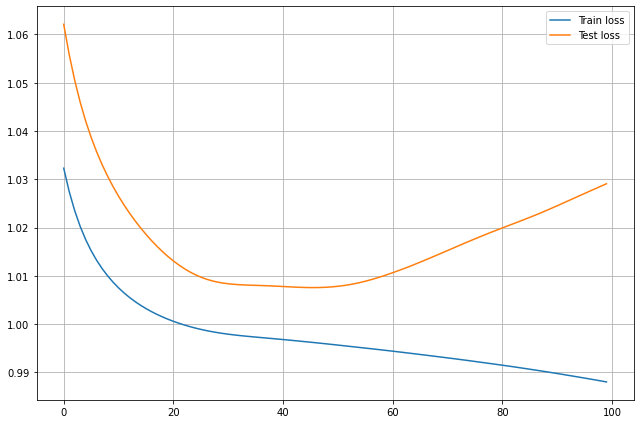

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.plot(list(range(len(train_losses))), train_losses, label="Train loss")
plt.plot(list(range(len(test_losses))), test_losses, label="Test loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## UNet: как реализовать

Сейчас мы с вами реализуем простой вариант UNet и попробуем ее обучить что-нибудь делать.

In [47]:
class UNet(nn.Module):
    def __init__(self, channels_in=3, channels_out=3, channels_encoder_hidden=8, channels_decoder_hidden=16, channels_skip_connection=2, num_downsamplings=4):
        super().__init__()
        
        self.input = nn.Conv2d(channels_in, channels_encoder_hidden, kernel_size=3, padding=1, stride=1)
        self.output = nn.Conv2d(channels_decoder_hidden, channels_out, kernel_size=5, padding=2, stride=1)
        self.lowest_layer = nn.Conv2d(channels_encoder_hidden * 2**num_downsamplings, 
                                      channels_decoder_hidden * 2**num_downsamplings,
                                      kernel_size=3, padding=1, stride=1)
        
        self.encoder_layers = nn.ModuleList()
        self.decoder_layers = nn.ModuleList()
        
        for i in range(num_downsamplings):
            encoder_layer = nn.Sequential(
                nn.Conv2d(channels_encoder_hidden * 2**i, channels_encoder_hidden * 2**(i+1), kernel_size=3, padding=1, stride=2),
                nn.ReLU(),
                nn.Conv2d(channels_encoder_hidden * 2**(i+1), (channels_encoder_hidden + channels_skip_connection) * 2**(i+1), kernel_size=3, padding=1, stride=1)
            )
            
            decoder_layer = nn.Sequential(
                nn.Conv2d((channels_decoder_hidden + channels_skip_connection) * 2**(i+1), channels_decoder_hidden * 2**(i+1), kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                nn.ConvTranspose2d(channels_decoder_hidden * 2**(i+1), channels_decoder_hidden * 2**i, kernel_size=4, stride=2, padding=1)
            )
            self.encoder_layers.append(encoder_layer)
            self.decoder_layers.append(decoder_layer)
        
        self.ceh = channels_encoder_hidden
    
        
    def forward(self, x):
        x = self.input(x)
        zs = []
        for i, m in enumerate(self.encoder_layers):
            xz = m(x)
            x, z = xz[:, :self.ceh * 2**(i+1)], xz[:, self.ceh * 2**(i+1):]
            zs.append(z)
        x = self.lowest_layer(x)
        for m, z in reversed(list(zip(self.decoder_layers, zs))):
            x = torch.cat([x, z], dim=-3)
            x = m(x)
        return self.output(x)

In [48]:
unet = UNet()

test_batch_x = torch.randn(128, 3, 64, 64)
unet(test_batch_x)

tensor([[[[-5.4472e-02, -4.1747e-02, -2.9013e-02,  ..., -2.9778e-02,
           -2.2575e-02, -2.0254e-02],
          [-6.5240e-02, -4.1572e-02, -3.9076e-02,  ..., -3.6432e-02,
           -2.4022e-02, -2.4889e-02],
          [-6.9226e-02, -4.5140e-02, -4.0019e-02,  ..., -3.9765e-02,
           -3.4154e-02, -3.5319e-02],
          ...,
          [-6.9301e-02, -4.3366e-02, -4.0544e-02,  ..., -4.0069e-02,
           -3.2499e-02, -3.0061e-02],
          [-6.2351e-02, -4.8961e-02, -3.8651e-02,  ..., -4.5688e-02,
           -4.1189e-02, -4.2037e-02],
          [-5.3848e-02, -3.5546e-02, -3.0432e-02,  ..., -3.6747e-02,
           -3.0947e-02, -3.1865e-02]],

         [[-3.6798e-02, -4.1885e-02, -4.6559e-02,  ..., -5.1245e-02,
           -4.1220e-02, -6.0531e-02],
          [-3.4893e-02, -3.5456e-02, -4.2303e-02,  ..., -3.3611e-02,
           -3.9196e-02, -3.9217e-02],
          [-3.2211e-02, -3.1355e-02, -4.4477e-02,  ..., -4.7762e-02,
           -3.1069e-02, -4.9169e-02],
          ...,
     